Develop a hypothesis and a research question based on the 2019 reading data.

1. Read in 2019 reading data.
2. Extract ALL NRC and Anew variables from the dataset
3. Run simple analyses to test hypothesis and answer research question

Outcome variables: readability, domain, text type

Ash, Xi, Kun

Research question: Are there any differents in sentiment scores among Wikipedia introduction of different domains?

Hypothesis: Wikipedia introduction related to History will have more positive and negative emotion than introduction related to Science or Technology. History introduction will be more emotional.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import spacy
import csv

nlp = spacy.load("en_core_web_sm")

In [2]:
# Load the Drive helper
from google.colab import drive

# Below will prompt for authorization but it will make your google drive available (i.e., mount your drive).
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/DS_5780_spring_25")

In [4]:
reading_df = pd.read_csv("reading_600_texts.csv", encoding = "ISO-8859-1")
reading_df.head()

,id,text,bt_readability,Source,Topic,Text type,Domain,
0,1,The Solar System is the Sun and all the object...,0.022084,https://simple.wikipedia.org/wiki/Solar_System,solar system,Simple,Science,NaN
1,2,An atom is the basic unit that makes up all ma...,0.117281,https://simple.wikipedia.org/wiki/Atom,atom,Simple,Science,NaN
2,3,An ion is an electrically charged atom or grou...,0.170116,https://simple.wikipedia.org/wiki/Ion,ion,Simple,Science,NaN
3,4,Plasma is a state of matter. The three other c...,0.393468,https://simple.wikipedia.org/wiki/Plasma_(phys...,plasma,Simple,Science,NaN
4,5,The South Pole is the most southern point on t...,0.007675,https://simple.wikipedia.org/wiki/South_Pole,South Pole,Simple,Science,NaN


In [5]:
reading_df_docs = list(nlp.pipe(reading_df.text))

In [6]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/DS_5780_spring_25/sentiment")

In [7]:
nrc_df = pd.read_csv('nrc.csv')

In [8]:
nrc_dict = {col.split('_')[0].lower(): nrc_df[col].dropna().tolist() for col in nrc_df.columns}

In [9]:
anew_dict = {}

with open('anew_data_99.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # skip header
    for row in reader:
        key = row[0]
        #values = row[1:] #this will read in values as a string
        values = [float(value) for value in row[1:]] #this will read in values as a float (which is what we want)
        anew_dict[key] = values

In [10]:
def safe_divide(a, b):
    if b != 0:
        return a/b
    else:
        return 0

In [11]:
# Extract terms with emotion

final_nw = []
final_positive = []
final_negative = []

for doc in reading_df_docs: #go through each document
  negative_count = 0
  positive_count = 0
  words = 0
  for token in doc: #go through each token in the document
    if not token.is_punct and not token.pos_ == "SPACE":
      #print(token.text, token.lemma_) #print token, lemma, and universal dependency pos tag
      words += 1
      if token.lower_ in nrc_dict["negative"]: # get the lower case words
        negative_count += 1
      if token.lower_ in nrc_dict["positive"]:
        positive_count += 1
  final_positive.append(safe_divide(positive_count, words)) #divide by number of words that have concreteness scores
  final_negative.append(safe_divide(negative_count, words))
  final_nw.append(words)

In [12]:
final_valence = []
final_arousal = []
final_dominance = []
final_nw = []

for doc in reading_df_docs:
  nw = []
  valence = []
  arousal = []
  dominance = []
  for token in doc:
    if token.is_alpha:
      nw.append(str(token)) #save it as string and not spacy token
      try:
        val = anew_dict[token.lower_] #try to look up if token has values and, if so, assign to val
        #val = anew_dict[token.lemma_] #This would work for lemmas

        valence.append(val[0])if val[0] else None #if statement to see if there is value, else append nothing (None)
        arousal.append(val[1])if val[1] else None
        dominance.append(val[2])if val[2] else None
      except KeyError: # handle the case when a key is not found in a dictionary during a dictionary lookup operation
        pass


  final_valence.append(safe_divide(sum(valence),len(valence))) #divide by number of words that have valence scores
  final_arousal.append(safe_divide(sum(arousal),len(arousal)))
  final_dominance.append(safe_divide(sum(dominance),len(dominance)))
  final_nw.append(len(nw))

In [13]:
reading_df['NW'] = final_nw #create a new column in pandas called NW and assign it the values from final_nw
reading_df['NRC_positive'] = final_positive
reading_df['NRC_negative'] = final_negative

reading_df['Valence'] = final_valence
reading_df['Arousal'] = final_arousal
reading_df['Dominance'] = final_dominance

In [14]:
reading_df.head()

,id,text,bt_readability,Source,Topic,Text type,Domain,,NW,NRC_positive,NRC_negative,Valence,Arousal,Dominance
0,1,The Solar System is the Sun and all the object...,0.022084,https://simple.wikipedia.org/wiki/Solar_System,solar system,Simple,Science,NaN,149,0.059603,0.000000,7.030909,4.958182,5.881818
1,2,An atom is the basic unit that makes up all ma...,0.117281,https://simple.wikipedia.org/wiki/Atom,atom,Simple,Science,NaN,139,0.035211,0.014085,6.102000,4.330000,5.134000
2,3,An ion is an electrically charged atom or grou...,0.170116,https://simple.wikipedia.org/wiki/Ion,ion,Simple,Science,NaN,143,0.072848,0.006623,5.110000,3.820000,4.750000
3,4,Plasma is a state of matter. The three other c...,0.393468,https://simple.wikipedia.org/wiki/Plasma_(phys...,plasma,Simple,Science,NaN,187,0.026455,0.010582,3.050000,5.430000,4.140000
4,5,The South Pole is the most southern point on t...,0.007675,https://simple.wikipedia.org/wiki/South_Pole,South Pole,Simple,Science,NaN,150,0.040000,0.013333,6.753636,5.087273,5.563636


In [15]:
reading_df.to_csv('reading_df.csv')

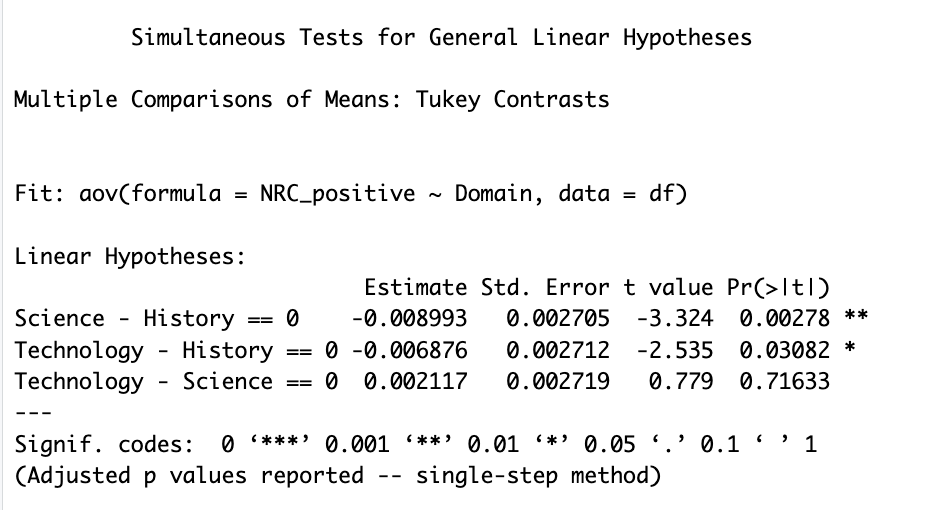
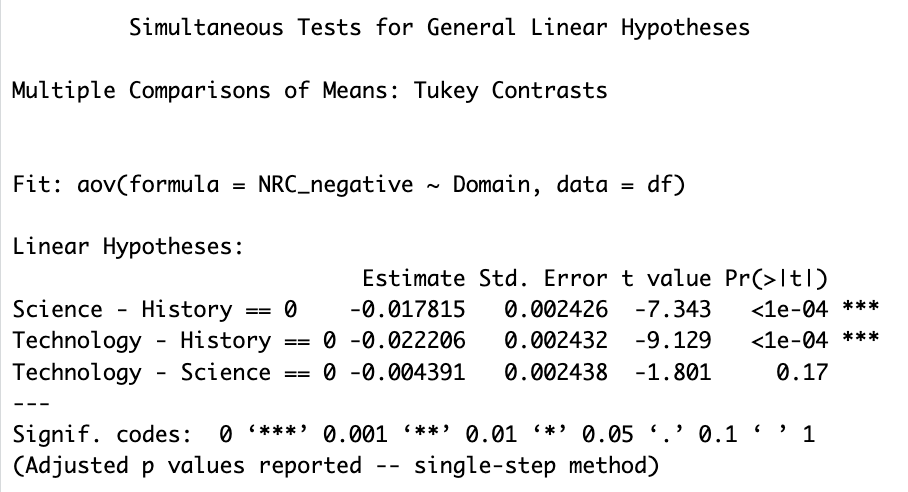

ANOVA test was used to compared the average sentiment (with NRC variables) scores of wikipedia introduction from each domain. Based on the post hoc test, we can observed that For both NRC_postive and NRC_negative variables, introductions related to History showed a significant difference when comparing to both Science and Technology wikipedia introductions. However, there was not a significant difference in positive or negative sentiment between Technology and Science.
According to the box plot, History wikipedia introductions have higher NRC_positive score and NRC_negative score than introductions related to science or technology. Introductions related to history may be more emotional.


ANOVA NRC_positive：
             sum_sq     df         F    PR(>F)
C(Domain)  0.008760    2.0  6.044467  0.002521
Residual   0.426076  588.0       NaN       NaN
Tukey HSD NRC_positive：
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2   meandiff p-adj   lower   upper  reject
---------------------------------------------------------
History    Science   -0.009 0.0027 -0.0153 -0.0026   True
History Technology  -0.0069 0.0309 -0.0132 -0.0005   True
Science Technology   0.0021 0.7163 -0.0043  0.0085  False
---------------------------------------------------------


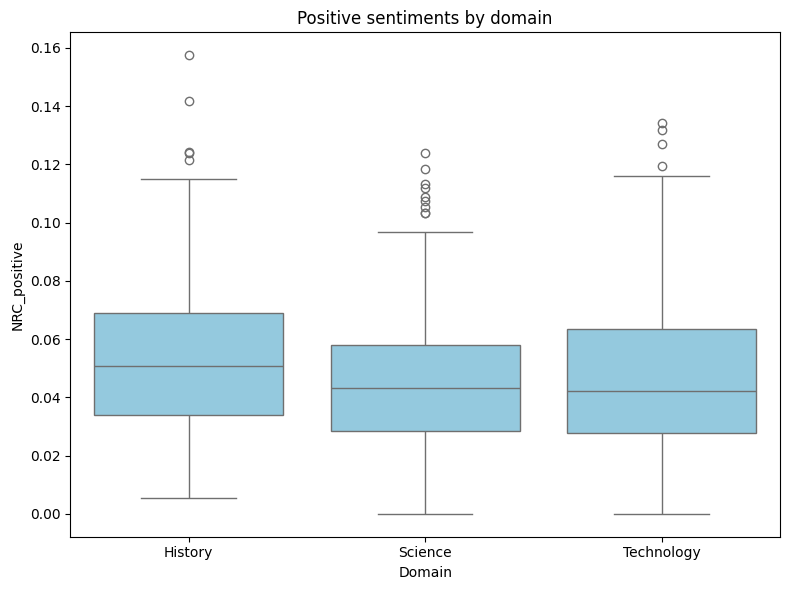

ANOVA NRC_negative：
             sum_sq     df          F        PR(>F)
C(Domain)  0.054681    2.0  46.920301  1.242148e-19
Residual   0.342626  588.0        NaN           NaN
Tukey HSD NRC_negative：
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2   meandiff p-adj   lower   upper  reject
---------------------------------------------------------
History    Science  -0.0178    0.0 -0.0235 -0.0121   True
History Technology  -0.0222    0.0 -0.0279 -0.0165   True
Science Technology  -0.0044 0.1702 -0.0101  0.0013  False
---------------------------------------------------------


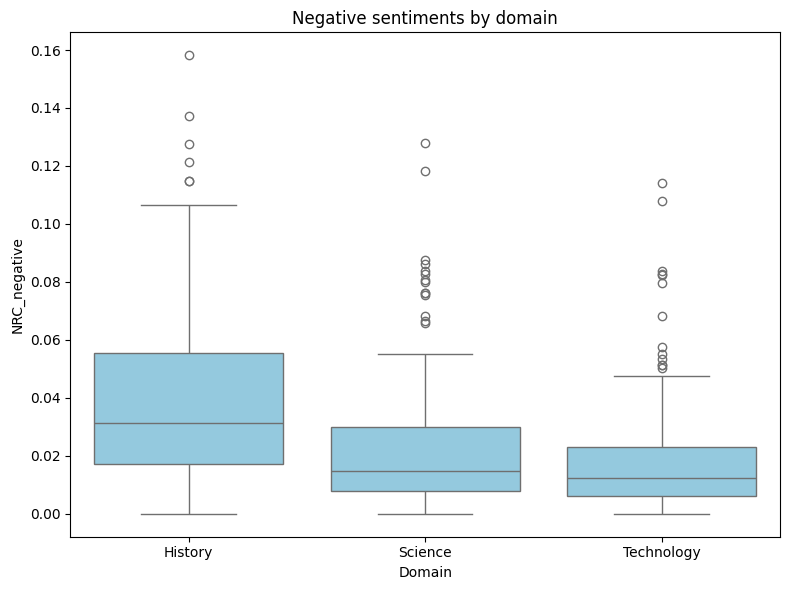

In [20]:
import os
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

reading_df['Domain'] = reading_df['Domain'].astype('category')

model_pos = smf.ols('NRC_positive ~ C(Domain)', data=reading_df).fit()
anova_result = sm.stats.anova_lm(model_pos, typ=2)
print("ANOVA NRC_positive：")
print(anova_result)

tukey_pos = pairwise_tukeyhsd(endog=reading_df['NRC_positive'],
                              groups=reading_df['Domain'],
                              alpha=0.05)
print("Tukey HSD NRC_positive：")
print(tukey_pos)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Domain', y='NRC_positive', data=reading_df, color="skyblue")
plt.title("Positive sentiments by domain")
plt.xlabel("Domain")
plt.ylabel("NRC_positive")
plt.tight_layout()
plt.show()

model_neg = smf.ols('NRC_negative ~ C(Domain)', data=reading_df).fit()

anova_result2 = sm.stats.anova_lm(model_neg, typ=2)
print("ANOVA NRC_negative：")
print(anova_result2)

tukey_neg = pairwise_tukeyhsd(endog=reading_df['NRC_negative'],
                              groups=reading_df['Domain'],
                              alpha=0.05)
print("Tukey HSD NRC_negative：")
print(tukey_neg)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Domain', y='NRC_negative', data=reading_df, color="skyblue")
plt.title("Negative sentiments by domain")
plt.xlabel("Domain")
plt.ylabel("NRC_negative")
plt.tight_layout()
plt.show()
